# Seurat clustering 120h_merged

In [20]:
Gastruloid_120h_merged_afterQC <- readRDS("./files/Seurat_Obj_afterQC/Gastruloid_120h_merged_afterQC.rds")

In [21]:
library(Seurat)
library(ggplot2)
library(SingleR)
library(dplyr)
library(celldex)
library(RColorBrewer)
library(SingleCellExperiment)
library(repr)



ERROR: Error in library(SingleR): there is no package called ‘SingleR’


# Processing of the data

In [22]:
mGast.list <- list(Gastruloid_120h_merged_afterQC)
mGast.list <- lapply(X = mGast.list, FUN = function(x) {
  x <- NormalizeData(x, verbose = FALSE)
  x <- FindVariableFeatures(x, verbose = FALSE)
  x <- ScaleData(x, verbose = FALSE)
  x <- RunPCA(x, verbose = FALSE)
  x <- RunUMAP(x, dims = 1:30, n.neighbors=10)
  x <- FindNeighbors(x, dims = 1:20)
  x <- FindClusters(x, resolution = 0.5)
  
})
Gastruloid_120h_merged_afterQC <- mGast.list[[1]]

14:21:35 UMAP embedding parameters a = 0.9922 b = 1.112

14:21:35 Read 14326 rows and found 30 numeric columns

14:21:35 Using Annoy for neighbor search, n_neighbors = 10

14:21:35 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:21:37 Writing NN index file to temp file /scratch/local/RtmpdGVRVS/file12bd930f730e1

14:21:37 Searching Annoy index using 1 thread, search_k = 1000

14:21:39 Annoy recall = 100%

14:21:40 Commencing smooth kNN distance calibration using 1 thread

14:21:41 Initializing from normalized Laplacian + noise

14:21:41 Commencing optimization for 200 epochs, with 196688 positive edges

14:21:46 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 14326
Number of edges: 459654

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8455
Number of communities: 11
Elapsed time: 3 seconds


# Cell cycle scoring

In [24]:
# Cell cycle scoring and regression

# Reading cell cycle file 
cell.cycle <- read.table("../files/Macosko_cell_cycle_genes.txt", header = T, sep = '\t')
s.genes <- cell.cycle$S
s.genes <- paste(toupper(substr(s.genes, 1, 1)), substr(tolower(s.genes), 2, nchar(s.genes)), sep="")
g2m.genes <- cell.cycle$G2.M
g2m.genes <- paste(toupper(substr(g2m.genes, 1, 1)), substr(tolower(g2m.genes), 2, nchar(g2m.genes)), sep="")


In [25]:
# checking in they are present in our dataset
table(s.genes %in% rownames(Gastruloid_120h_merged_afterQC))
table(g2m.genes %in% rownames(Gastruloid_120h_merged_afterQC))


FALSE  TRUE 
   50   101 


FALSE  TRUE 
   26   125 

In [26]:
# keeping only those that are found (otherwise the regression is not working)
s.genes <- s.genes[s.genes %in% rownames(Gastruloid_120h_merged_afterQC)]
g2m.genes <- g2m.genes[g2m.genes %in% rownames(Gastruloid_120h_merged_afterQC)]

In [27]:
# cell cycle scoring
Gastruloid_120h_merged_afterQC <- CellCycleScoring(Gastruloid_120h_merged_afterQC, s.features = s.genes, g2m.features = g2m.genes, set.ident = T)

In [29]:
library(ggplot2)

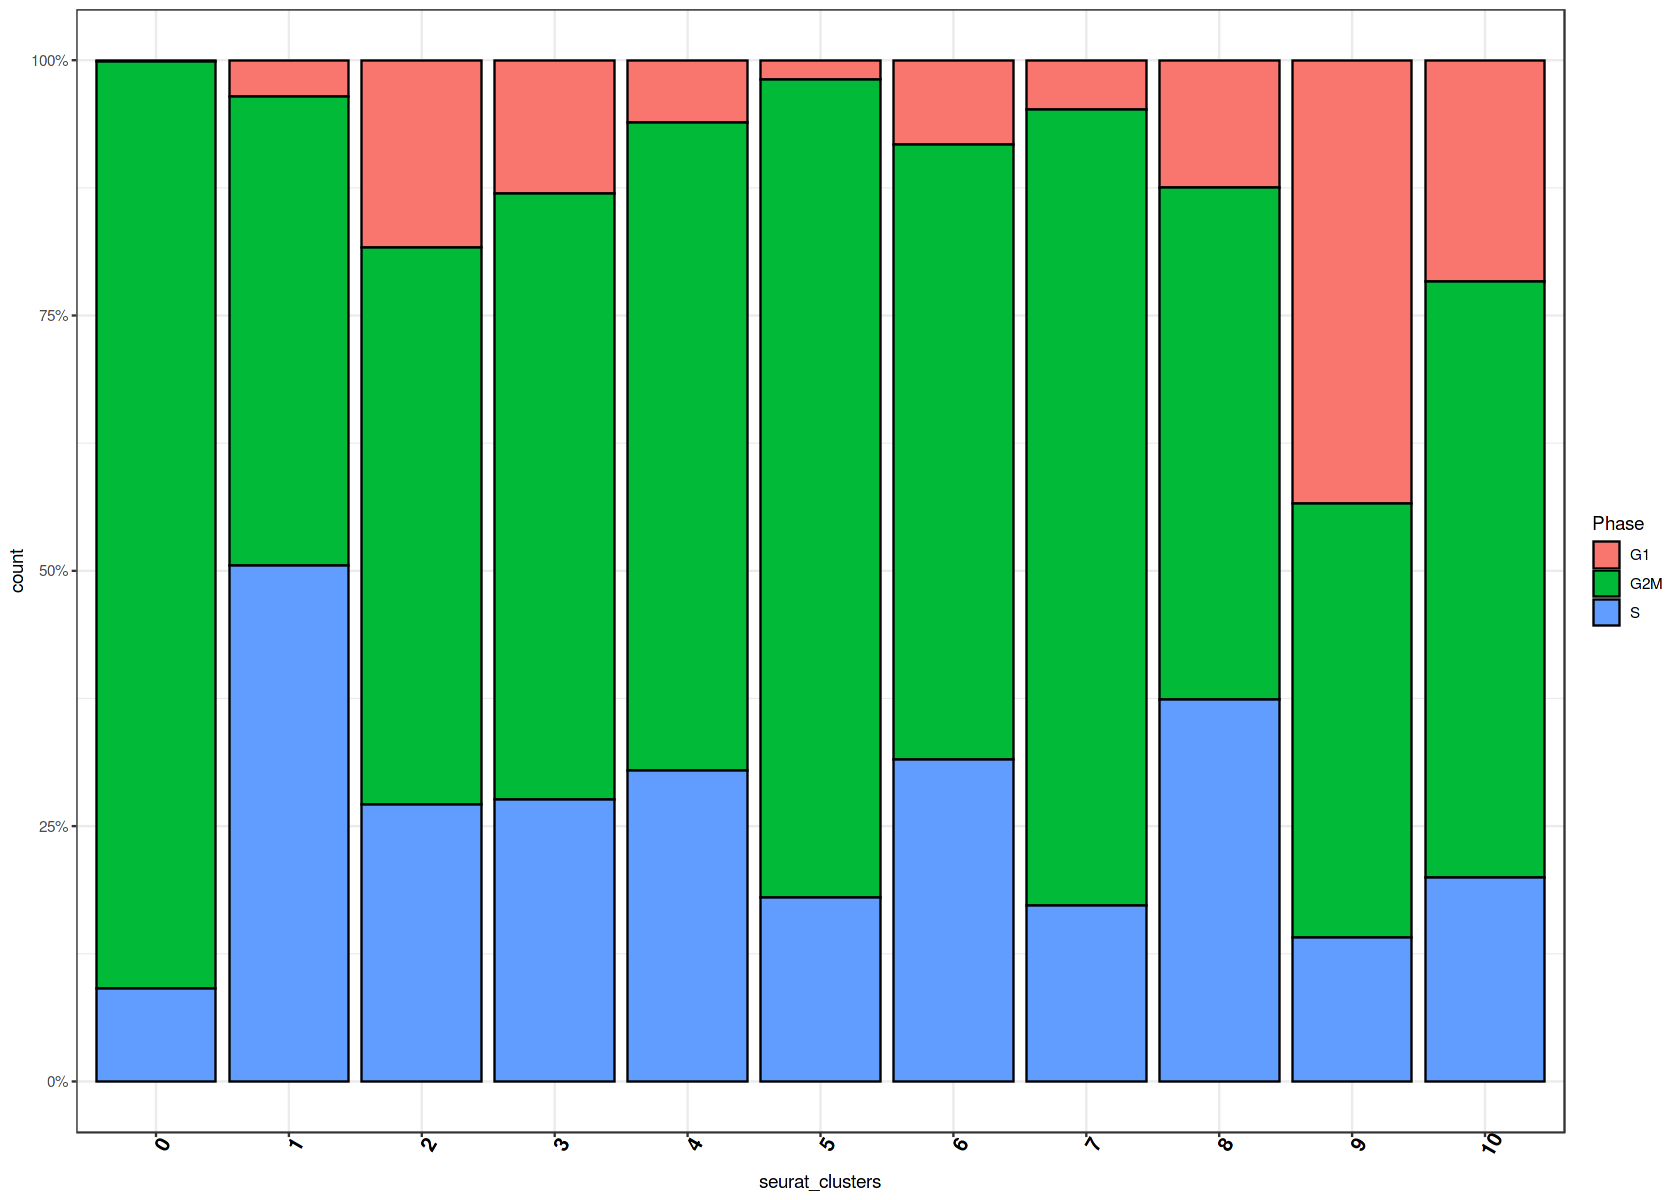

In [32]:
options(repr.plot.width=14, repr.plot.height=10)

ggplot(Gastruloid_120h_merged_afterQC@meta.data, aes(x=seurat_clusters, fill=Phase)) +
  geom_bar(position = "fill", colour="black") +
  #scale_fill_manual(values = cols$colors) +
  theme_bw() +
  scale_y_continuous(labels = scales::percent) + theme(legend.position="right")+
  theme(axis.text.x = element_text(face="bold", color="black", 
                           size=12, angle=60))

# Cell cycle regression 

In [33]:
# scaling the data with regression of cell cycle genes
Gastruloid_120h_merged_afterQC <- ScaleData(Gastruloid_120h_merged_afterQC, vars.to.regress = c("S.Score", "G2M.Score"), verbose = FALSE)
Gastruloid_120h_merged_afterQC <- RunPCA(Gastruloid_120h_merged_afterQC, verbose = FALSE)
Gastruloid_120h_merged_afterQC <- RunUMAP(Gastruloid_120h_merged_afterQC, dims = 1:30, n.neighbors=10)



14:25:56 UMAP embedding parameters a = 0.9922 b = 1.112

14:25:56 Read 14326 rows and found 30 numeric columns

14:25:56 Using Annoy for neighbor search, n_neighbors = 10

14:25:56 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:25:58 Writing NN index file to temp file /scratch/local/RtmpdGVRVS/file12bd93cf41ebf

14:25:58 Searching Annoy index using 1 thread, search_k = 1000

14:26:00 Annoy recall = 100%

14:26:01 Commencing smooth kNN distance calibration using 1 thread

14:26:02 Initializing from normalized Laplacian + noise

14:26:02 Commencing optimization for 200 epochs, with 198690 positive edges

14:26:07 Optimization finished



# Saving the data

In [49]:
metadata_120h_merged_afterQC <- Gastruloid_120h_merged_afterQC@meta.data

In [50]:
# Save the files
saveRDS(Gastruloid_120h_merged_afterQC, file = "./files/Seurat_Obj_afterQC/SeuratClustering_individual_timepoints/Gastruloid_120h_merged_afterQC.rds")
saveRDS(metadata_120h_merged_afterQC, file = "./files/Seurat_Obj_afterQC/SeuratClustering_individual_timepoints/metadata_120h_merged_afterQC.rds")